# **[9] 강화학습**

**[학습 목표]**
1. 강화학습의 학습 원리를 이해할 수 있다.
2. 강화학습이 사용되는 다양한 사례를 탐색할 수 있다.
3. 강화학습을 이용하여 실제 게임을 학습시킬 수 있다.

## **1. 강화학습**  


### **(1) 강화학습의 원리**  


> 강화학습은 지도/비지도 기계학습과 달리, 아무런 데이터가 주어지지 않습니다.  
> 대신 에이전트에게 주어진 상태에서 행동의 결과에 대한 **보상**을 줍니다.   
> 에이전트는 어떤 액션을 취해야만 시간의 흐름에 따라 가장 큰 보상을 가져올지 스스로 학습하는 것이죠.

> 게임을 하는 사람이 게임 실력을 키우는 과정을 통해, 강화 학습의 원리를 자세하게 이해해봅시다.

<table>
<tr>
    <th><img src="https://drive.google.com/uc?id=1VLIg1Yf-Rw_G6yrf0Tj-aDfE5oNEj-6F" width="750"></th>
    </tr>
<tr>
    <th>강화학습의 원리</th>
</tr>
</table>  


> * 에이전트: 둘러싸고 있는 환경과 상호작용하는 행동의 주체
> * 환경: 에이전트를 둘러싸고 있는 것들
> * 상태: 에이전트에 대한 상태를 숫자로 표현한 것
> * 행동: 에이전트가 실제 행동한 내용
> * 보상: 에이전트가 행동한 결과로 받게 되는 것
> * 정책: 에이전트가 행동하는 방향
>
> 에이전트는 게임이라는 환경에서, 어떻게 행동해야 더 많은 보상을 얻을지 학습합니다.  
> 학습을 통해, 에이전트는 더 많은 보상을 얻기 위한 정책을 수립합니다.

### **(2) 강화학습의 생활 속 사례**  


강화학습은 실제 생활 속에서 다양하게 사용될 수 있습니다.  
아래 두 가지 예시를 소개하지만, 그 외의 다른 예시들도 유튜버 "생활코딩"님께서 정리하신 링크를 통해 확인할 수 있습니다.  

https://docs.google.com/spreadsheets/d/1TnRTcrA7yapqfnXCm_M6ZURD7ofLbH62mZIjznwEOKI/edit#gid=414903589

> 예시 1: 인공지능 골키퍼가 상대 선수의 축구공을 막는다.  
>
> - 에이전트 : 골키퍼
> - 환경 : 축구장
> - 행동 : 상대의 키퍼가 찬 공을 막는다.
> - 보상 : 상대가 찬 공이 골대에 들어가지 않으면 득점을 막을 수 있다.
> - 상태 : 상대선수가 차는 축구공을 막기위한 골대의 골키퍼"

<table>
<tr>
    <th><a href="https://youtu.be/7Yc6ZHixgRk"><img src="https://drive.google.com/uc?id=1E5Fd779GzYJTeJxMNpLKkimYyFl8A2Fx" width="750"></a></th>
    </tr>
<tr>
    <th>예시 1 - 인공지능 골키퍼</th>
</tr>
</table>  

> 예시 2: 강화학습을 통해 볼링공이 볼링을 맞춥니다.  
>
> - 에이전트 : 볼링공
> - 환경 : 볼링장
> - 행동 : 볼링공을 계속 굴리기
> - 보상 : 볼링핀을 시간 내에 맞추면 상을 준다. 못 맞히거나 시간을 초과하면 벌을 준다
> - 상태 : 볼링공과 볼링핀의 거리, 볼링공의 위치

<table>
<tr>
    <th><a href="https://www.youtube.com/watch?v=nReMgotclXU"><img src="https://drive.google.com/uc?id=1E7g_ZyZaaXfY6EB3ePeuaxJohADJK79m" width="750"></a></th>
    </tr>
<tr>
    <th>예시 2 - 인공지능 볼링</th>
</tr>
</table>  

## **2. 강화학습 실습**  


이번 실습은 코드를 이해하기보다는 강화학습이 수행되는 과정을 관찰하는 것을 중심으로 해주세요!  
또한 이번 실습은 학습에 **매우 긴 시간**(약 30분)이 소요됩니다. 미리 코드를 실행하는 것을 추천드립니다.

### **(1) 세팅**  


In [1]:
!sudo apt install xvfb

!pip install gym
!pip install gym-notebook-wrapper

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,697 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 x11-xkb-utils amd64 7.7+5 [158 kB]
Get:5 http://archive.ubuntu.com/ubunt

In [13]:
import gym
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.optimizers import Adam

In [14]:
class DQN(tf.keras.Model):
    def __init__(self, action_size):
        super(DQN, self).__init__()
        self.fc1 = Dense(24, activation='relu')
        self.fc2 = Dense(24, activation='relu')
        self.fc_out = Dense(action_size, kernel_initializer=RandomUniform(-1e-3, 1e-3))

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        q = self.fc_out(x)
        return q

In [15]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size

        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 1000

        self.memory = deque(maxlen=2000)

        self.model = DQN(action_size)
        self.target_model = DQN(action_size)
        self.optimizer = Adam(lr=self.learning_rate)
		
        self.update_target_model()

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def choose_action(self, state):
        return random.randrange(self.action_size) if (np.random.rand() <= self.epsilon) else np.argmax(self.model.predict(state))
    def train_model(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        mini_batch = random.sample(self.memory, self.batch_size)

        states = np.array([sample[0][0] for sample in mini_batch])
        actions = np.array([sample[1] for sample in mini_batch])
        rewards = np.array([sample[2] for sample in mini_batch])
        next_states = np.array([sample[3][0] for sample in mini_batch])
        dones = np.array([sample[4] for sample in mini_batch])

        model_params = self.model.trainable_variables
        with tf.GradientTape() as tape:
            predicts = self.model(states)
            one_hot_action = tf.one_hot(actions, self.action_size)
            predicts = tf.reduce_sum(one_hot_action * predicts, axis=1)

            target_predicts = self.target_model(next_states)
            target_predicts = tf.stop_gradient(target_predicts)

            max_q = np.amax(target_predicts, axis=-1)
            targets = rewards + (1 - dones) * self.discount_factor * max_q
            loss = tf.reduce_mean(tf.square(targets - predicts))

        grads = tape.gradient(loss, model_params)
        self.optimizer.apply_gradients(zip(grads, model_params))        

### **(2) CartPole 학습**  


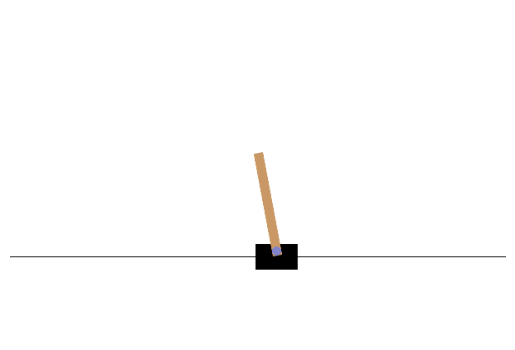

Episode finished after 16 timesteps


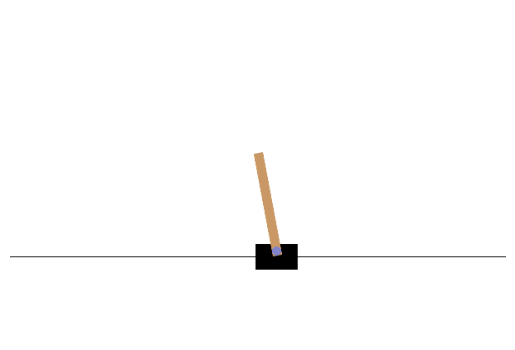

In [35]:
import gym
import gnwrapper
import time

env = gnwrapper.Animation(gym.make('CartPole-v1'))
runtime = 5

for i_episode in range(runtime):
    obs = env.reset()

    for t in range(100):
        env.render()
        observation, reward, done, info = env.step(env.action_space.sample())

        if done:
            print("Episode finished after {} timesteps".format(t+1))
            time.sleep(1)
            break

env.close()

In [31]:
env = gnwrapper.Animation(gym.make('CartPole-v1'))
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent = DQNAgent(state_size, action_size)

scores, episodes = [], []
counts = []
score_avg = 0

num_episode = 100

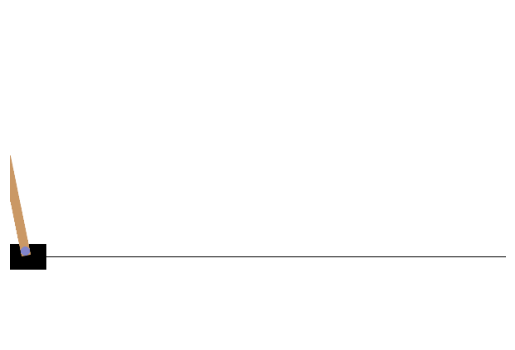

1/1 [==============================] - 0s 25ms/step
Episode finished after 170 timesteps
episode:  99 | score avg 190.59 | memory length: 2000 | epsilon: 0.0100


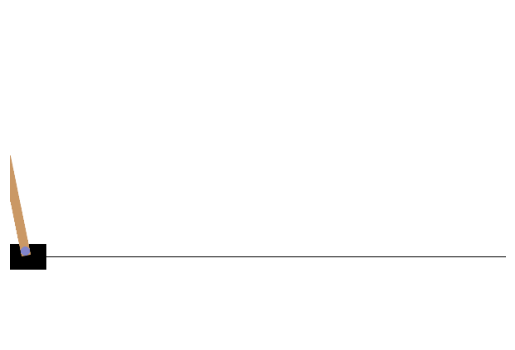

In [32]:
for e in range(num_episode):
    done = False
    score = 0

    state = env.reset()
    state = state.reshape(1, -1)
    count = 0

    while not done:
        env.render()

        action = agent.choose_action(state)

        next_state, reward, done, info = env.step(action)
        next_state = next_state.reshape(1, -1)

        score += reward
        reward = 0.1 if not done or score == 500 else -1

        agent.remember(state, action, reward, next_state, done)

        if len(agent.memory) >= agent.train_start:
            agent.train_model()

        state = next_state
        count += 1

        if done:
            agent.update_target_model()

            score_avg = 0.9 * score_avg + 0.1 * score if score_avg != 0 else score
            print("Episode finished after {} timesteps".format(count+1))
            print('episode: {:3d} | score avg {:3.2f} | memory length: {:4d} | epsilon: {:.4f}'.format(e, score_avg, len(agent.memory), agent.epsilon))

            scores.append(score_avg)
            episodes.append(e)
            counts.append(count)

            time.sleep(1)

Text(0, 0.5, 'average score, timesteps')

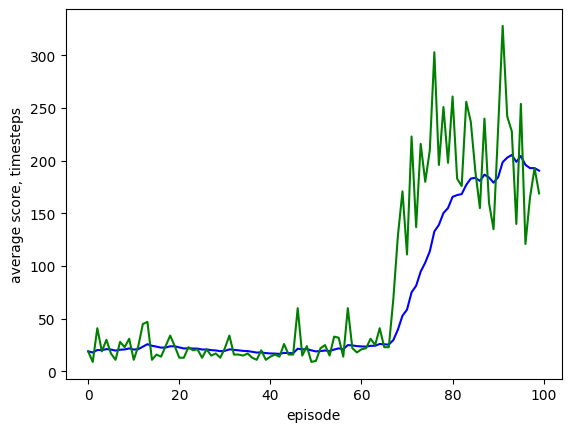

In [34]:
plt.plot(episodes, scores, 'blue')
plt.plot(episodes, counts, 'green')
plt.xlabel('episode')
plt.ylabel('average score, timesteps')